<a href="https://colab.research.google.com/github/arunbalajitsr/Mushroom-classification/blob/main/Mushroom_Classification_using_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading dataset:

In [3]:
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


Importing libraries:

In [53]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
label = LabelEncoder()

Preprocessing of data into necessary format:

In [54]:
data = pd.read_csv("mushrooms.csv")

In [36]:
data.shape

(8124, 23)

In [55]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


**Converting the labelled data into numerical using LabelEncoder of ScikitLearn**

In [56]:
for col in data.columns:
    data[col]=label.fit_transform(data[col])    

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [50]:
df.to_csv('mushroom_converted.csv')

**Splitting input and output data into seperate arrays:**

In [51]:
data = np.genfromtxt('mushrooms_converted.csv', delimiter = ',')
X = data[:,1:23]
y = data[:, 0]
print(X)
print(y)

[[5. 2. 4. ... 2. 3. 5.]
 [5. 2. 9. ... 3. 2. 1.]
 [0. 2. 8. ... 3. 2. 3.]
 ...
 [2. 2. 4. ... 0. 1. 2.]
 [3. 3. 4. ... 7. 4. 2.]
 [5. 2. 4. ... 4. 1. 2.]]
[1. 0. 0. ... 0. 1. 0.]


**Splitting the data into test and train datasets randomly using train_test_split library**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
X_test = X_test.T
y_test = y_test.reshape(1, y_test.shape[0])
print ('Train X size is ', X_train.shape)
print ('Train Y size is ', y_train.shape)
print ('\nTest Dataset size is ', X_test.shape)

Train X size is  (22, 6499)
Train Y size is  (1, 6499)

Test Dataset size is  (22, 1625)


**Defining the neural network structure (Number of nodes in input and hidden layer)**

In [58]:
def neural_network(X, Y):
    input_unit = X.shape[0]
    hidden_unit = 22
    output_unit = Y.shape[0]
    return (input_unit, hidden_unit, output_unit)

In [59]:
(input_unit, hidden_unit, output_unit) = neural_network(X_train, y_train)
print("There are "+ str(input_unit)+" input layers and "+str(hidden_unit)+" hidden layers")

There are 22 input layers and 22 hidden layers


**Allotting random weights and zero bias initially**

In [60]:
def random_weights(input_unit, hidden_unit, output_unit):
    np.random.seed(2) 
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))
    weights = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return weights

**Function to perform Sigmoid function**

In [61]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

**Forward Propagation**

In [75]:
def forward_propagation(X, weights):
    W1 = weights['W1']
    b1 = weights['b1']
    W2 = weights['W2']
    b2 = weights['b2']
    Z1 = np.dot(W1, X) + b1
    Activation_one = np.tanh(Z1)
    #Activation_one = sigmoid(Z1) (Sigmoid had less accuracy so used tanh activation)
    Z2 = np.dot(W2, Activation_one) + b2
    Activation_two = sigmoid(Z2)
    cache = {"Z1": Z1,"Activation1": Activation_one,"Z2": Z2,"Activation2": Activation_two}
    return Activation_two, cache

**Calculating cost**

In [88]:
def cost_function(Activation_two, Y):
    m = Y.shape[1] 
    logprobs = np.multiply(np.log(Activation_two), Y) + np.multiply((1-Y), np.log(1 - Activation_two))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))                              
    return cost

**Propagating Backwards**

In [66]:
def backward_propagation(weights, cache, X, Y):
    #number of training example
    m = X.shape[1]
    
    W1 = weights['W1']
    W2 = weights['W2']
    Activation_one = cache['Activation1']
    Activation_two = cache['Activation2']
   
    dZ2 = Activation_two-Y
    dW2 = (1/m) * np.dot(dZ2, Activation_one.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(Activation_one, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return grads

**Gradient Descent (Updating weights) and setting learning rate**

In [68]:
def gradient_descent(weights, grads, learning_rate = 0.01):
    W1 = weights['W1']
    b1 = weights['b1']
    W2 = weights['W2']
    b2 = weights['b2']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    updated_weights = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return updated_weights

**Model program for testing dataset**

In [93]:
def neural_network_model(X, Y, hidden_unit, num_iterations = 1000):
    np.random.seed(3)
    input_unit = neural_network(X, Y)[0]
    output_unit = neural_network(X, Y)[2]
    
    weights = random_weights(input_unit, hidden_unit, output_unit)
   
    W1 = weights['W1']
    b1 = weights['b1']
    W2 = weights['W2']
    b2 = weights['b2']
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, weights)
        cost = cost_function(A2, Y)
        grads = backward_propagation(weights, cache, X, Y)
        weights = gradient_descent(weights, grads)
        if i % 5 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return weights

**Cost reduces after each iteration of training**

In [94]:
final_weights = neural_network_model(X_train, y_train, 4, num_iterations=1000)

Cost after iteration 0: 0.693059
Cost after iteration 5: 0.693005
Cost after iteration 10: 0.692950
Cost after iteration 15: 0.692893
Cost after iteration 20: 0.692835
Cost after iteration 25: 0.692774
Cost after iteration 30: 0.692710
Cost after iteration 35: 0.692642
Cost after iteration 40: 0.692571
Cost after iteration 45: 0.692494
Cost after iteration 50: 0.692412
Cost after iteration 55: 0.692323
Cost after iteration 60: 0.692228
Cost after iteration 65: 0.692125
Cost after iteration 70: 0.692013
Cost after iteration 75: 0.691892
Cost after iteration 80: 0.691760
Cost after iteration 85: 0.691618
Cost after iteration 90: 0.691462
Cost after iteration 95: 0.691293
Cost after iteration 100: 0.691109
Cost after iteration 105: 0.690909
Cost after iteration 110: 0.690691
Cost after iteration 115: 0.690454
Cost after iteration 120: 0.690196
Cost after iteration 125: 0.689914
Cost after iteration 130: 0.689608
Cost after iteration 135: 0.689274
Cost after iteration 140: 0.688910
Cost af

In [95]:
def prediction(weights, X):
    Activation2, cache = forward_propagation(X, weights)
    predictions = np.round(Activation2)
    return predictions

**Accuracy Calculations**

In [98]:
predictions = prediction(final_weights, X_test)
accuracy=float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T))/float(y_test.size)*100)
print ("Accuracy for test data set is "+str(accuracy)+' %')


Accuracy for test data set is 87.75384615384615 %


# **Now this is done again below using MLPClassifier Library of ScikitLearn to plot graphs and obtain insights**

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


array_str = np.loadtxt(fname="mushrooms.csv", dtype=str, delimiter=",", skiprows=1)
array = np.zeros(shape=array_str.shape, dtype=int)


le = LabelEncoder();

for i in range(array.shape[1]):
        array[:, i] = le.fit_transform(array_str[:, i])

y = array[:, 0]  
x = array[:, 1:]

np.savetxt("y.csv", y, delimiter=",")
np.savetxt("x.csv", x, delimiter=",")

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.99, random_state=42)

mlp = MLPClassifier(max_iter=2000, learning_rate_init=0.001,)

history=mlp.fit(X_train, y_train)

mlp_train_score = mlp.score(X_train, y_train)
mlp_test_score = mlp.score(X_test, y_test)

print("Accuracy", mlp_test_score*100,"%")

Accuracy 92.8384930995897 %


**Cost(error) graph**

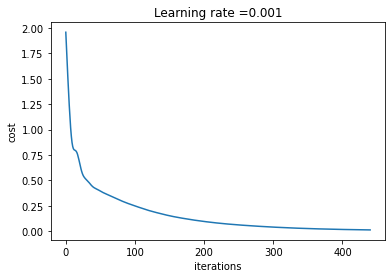

In [6]:
import matplotlib.pyplot as plt
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(mlp.loss_curve_)
plt.show()

**Accuracy graph**

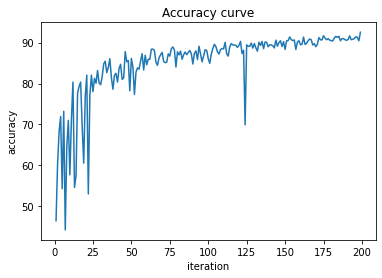

In [7]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
accuracy1=[]
iteration=[]
for i in range(1,1000):
  mlp = MLPClassifier(max_iter=i, learning_rate_init=0.001,)
  history=mlp.fit(X_train, y_train)
  mlp_test_score = mlp.score(X_test, y_test)
  accuracy1.append(mlp_test_score*100)
  iteration.append(i)

plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.title("Accuracy curve")
plt.plot(iteration, accuracy1,)
plt.show()

In [8]:
output_prediction = mlp.predict(X_test)
print(output_prediction[4])

1
